### Deep Learning - LOAN

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
# not.fully.paid 데이터 숫자 맞추기
from sklearn.utils import shuffle 
from sklearn.utils import resample 


In [30]:
from sklearn.model_selection import train_test_split

In [6]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [33]:
from sklearn.preprocessing import StandardScaler

In [7]:
# data load
data = pd.read_csv('dataset/loan_data.csv')

In [8]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
# one-hot encoding
data = pd.get_dummies(data, columns=['purpose'], prefix='purpose')

In [10]:
data.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

In [27]:
data.sample(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
3993,1,0.1126,394.36,10.714418,17.39,722,2699.958333,5079,14.8,2,0,0,0,False,True,False,False,False,False,False
3871,1,0.1284,90.77,10.714418,9.17,697,6600.000000,2857,92.2,0,0,0,0,False,False,True,False,False,False,False
9159,0,0.1284,268.95,10.757903,14.17,687,3389.958333,9058,44.3,4,0,0,0,False,False,True,False,False,False,False
4418,1,0.0859,189.67,10.858999,21.60,732,3240.000000,10813,14.9,2,0,0,0,True,False,False,False,False,False,False
118,1,0.1375,263.09,11.038110,9.80,677,3089.958333,12231,81.0,3,0,0,1,False,False,True,False,False,False,False
3513,1,0.1357,154.56,11.775290,17.46,682,4800.000000,66461,90.1,0,0,0,0,True,False,False,False,False,False,False
2950,1,0.1221,263.19,10.819778,7.25,737,4109.958333,2140,6.0,3,0,0,0,True,False,False,False,False,False,False
1729,1,0.1095,294.43,11.385092,12.78,722,2640.041667,19457,63.6,0,0,0,0,False,False,False,False,False,False,True
3787,1,0.1126,328.64,11.373663,10.41,747,3900.958333,14406,37.1,3,0,0,0,True,False,False,False,False,False,False
5923,1,0.1357,326.10,10.242813,4.66,682,2280.041667,3288,35.0,1,0,0,0,False,False,False,False,False,True,False


In [12]:
data.shape

(9578, 20)

##### EDA 등 탐색적 분석

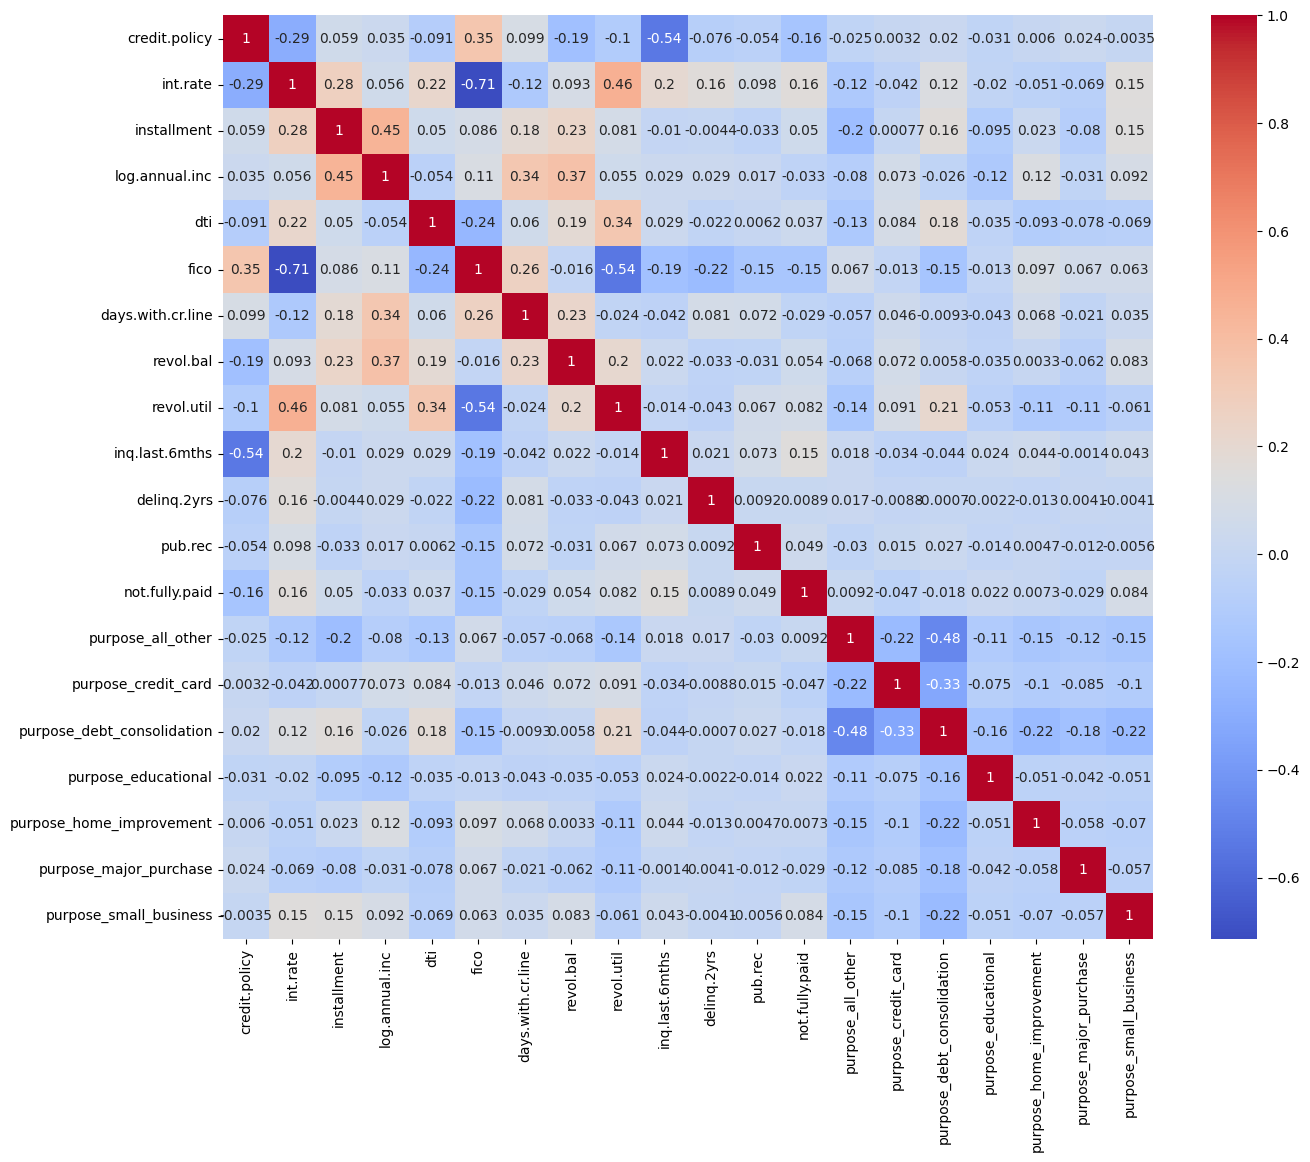

In [18]:
# 히트맵
matrix = data.corr()
plt.figure(figsize = (15,12))
sns.heatmap(data = data.corr(), annot = True, cmap="coolwarm")
plt.show()

In [22]:
# data의 왜도 계산 -> 정규분포
data.skew() 

credit.policy                 -1.539621
int.rate                       0.164420
installment                    0.912522
log.annual.inc                 0.028668
dti                            0.023941
fico                           0.471260
days.with.cr.line              1.155748
revol.bal                     11.161058
revol.util                     0.059985
inq.last.6mths                 3.584151
delinq.2yrs                    6.061793
pub.rec                        5.126434
not.fully.paid                 1.854592
purpose_all_other              1.196271
purpose_credit_card            2.177793
purpose_debt_consolidation     0.352884
purpose_educational            4.996915
purpose_home_improvement       3.507347
purpose_major_purchase         4.355613
purpose_small_business         3.542085
dtype: float64

##### 정규분포

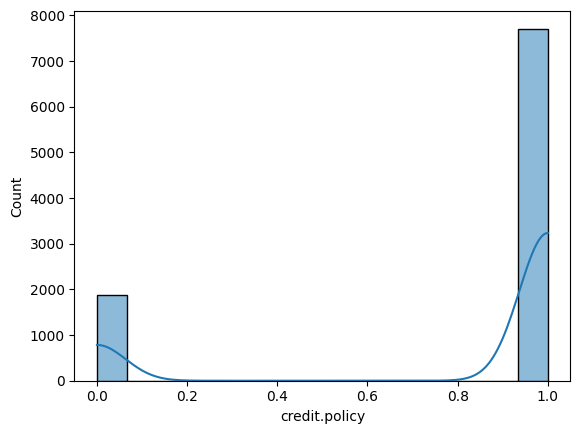

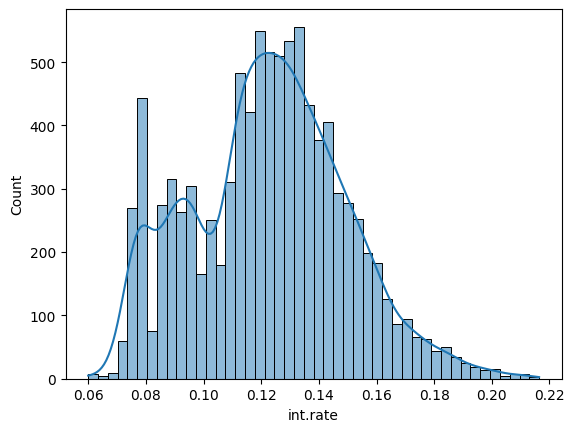

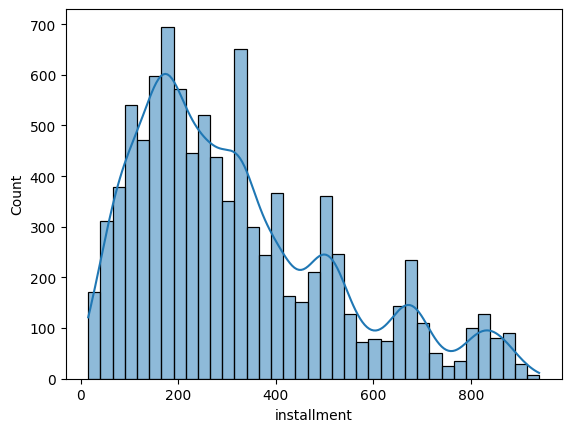

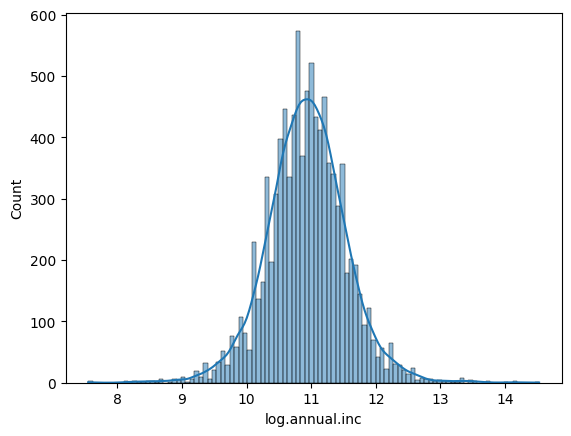

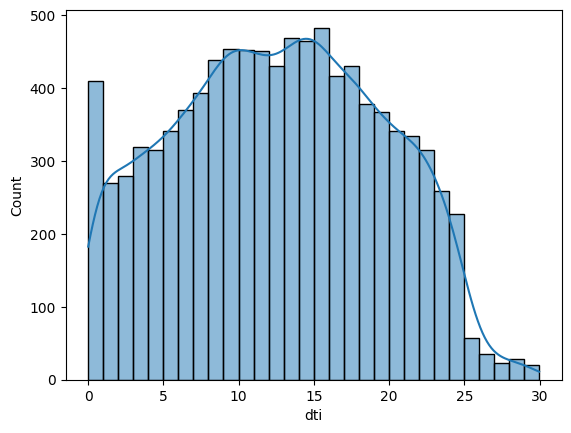

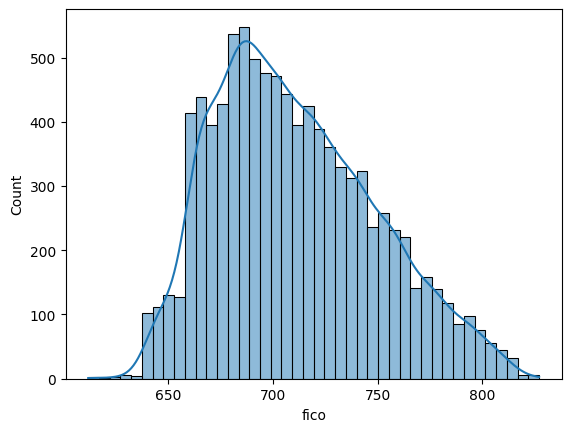

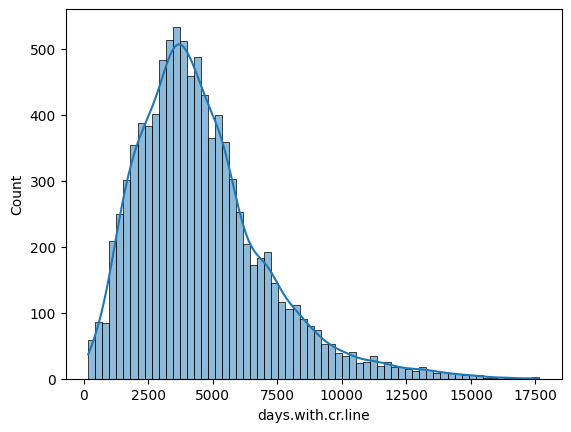

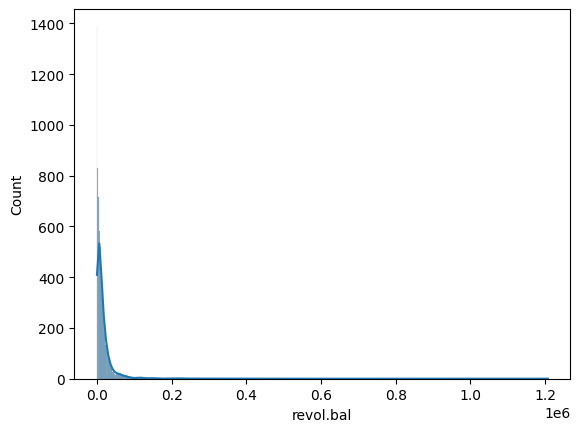

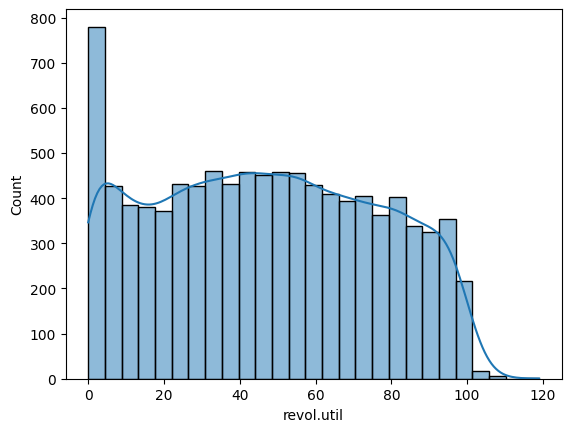

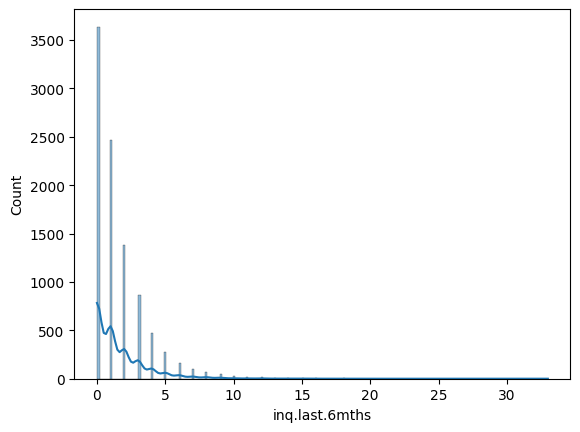

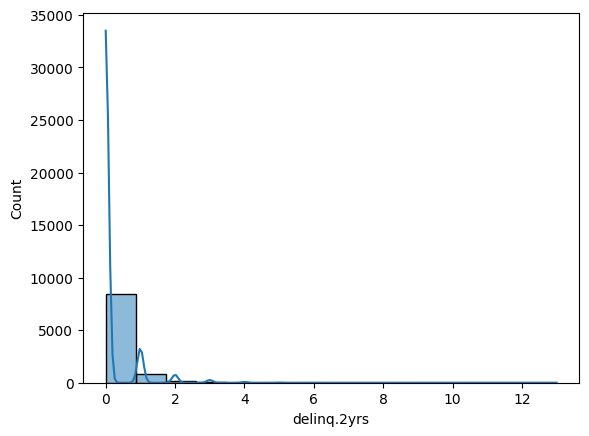

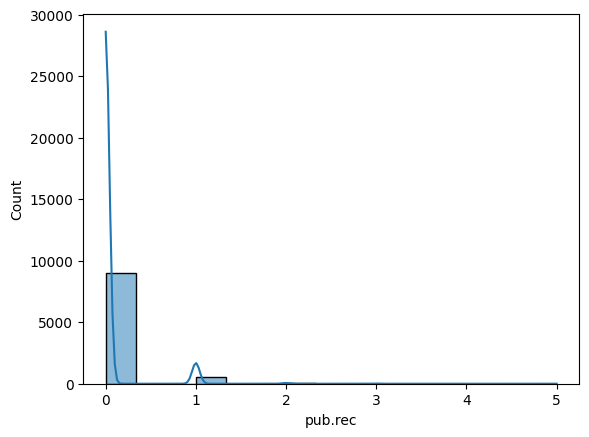

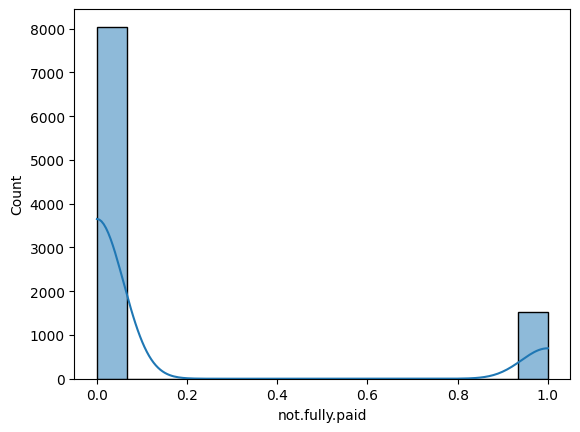

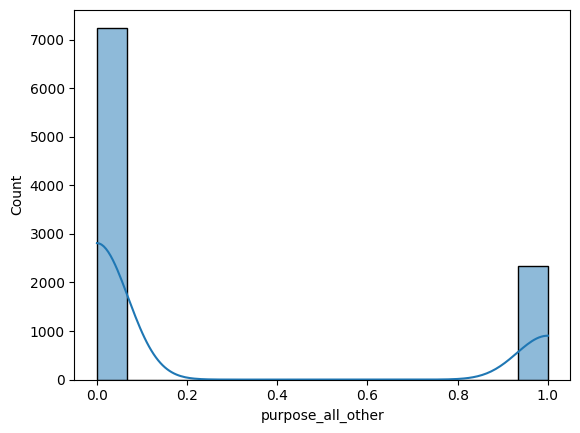

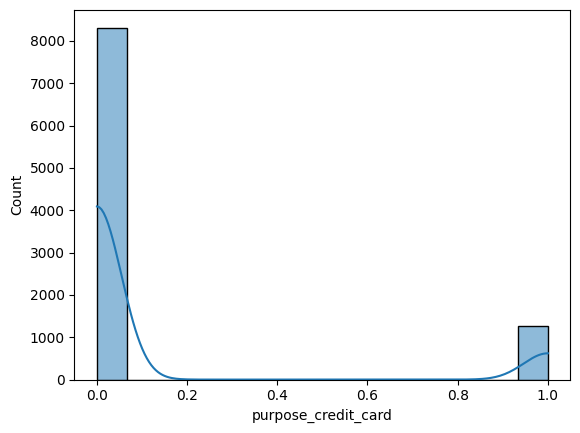

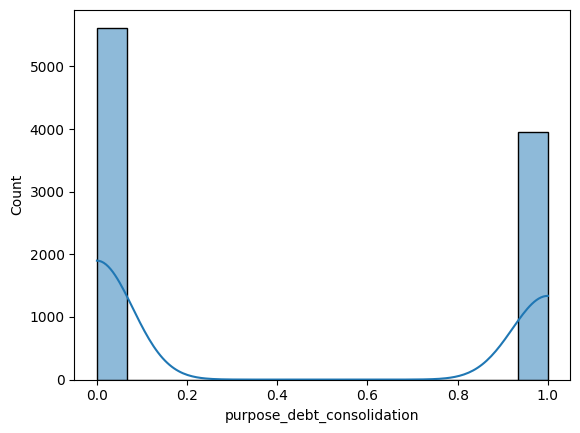

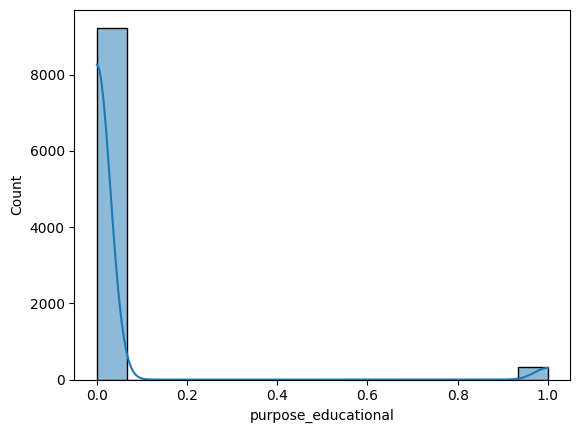

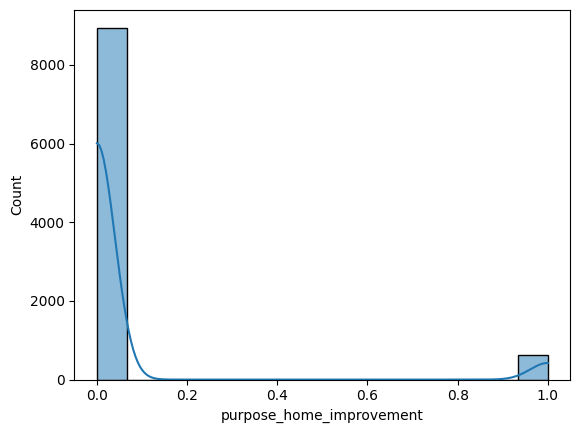

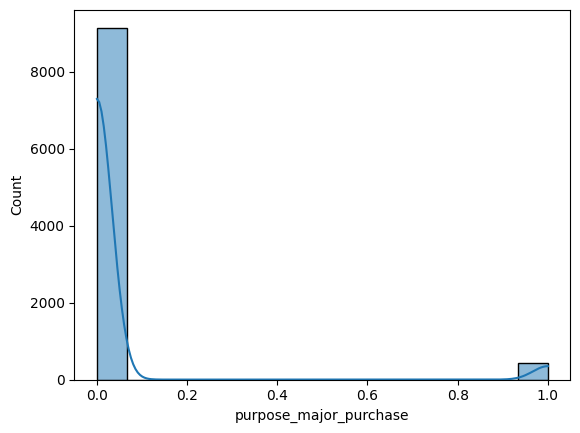

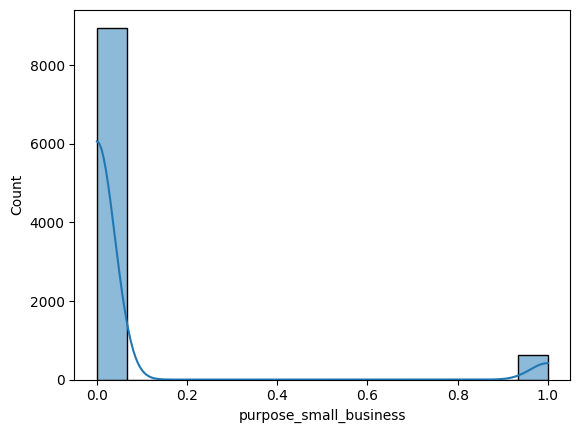

In [24]:
for x in data.columns:
    sns.histplot(data[x], kde = True)
    plt.show()

In [98]:
# Features which is neear to normal distribution
df.columns[(df.skew()<1)& (df.skew()>0)]

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'purpose_debt_consolidation'],
      dtype='object')

##### Target data imbalance 해결 - oversampling

In [44]:
# Checking the distribution of Target
data["not.fully.paid"].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

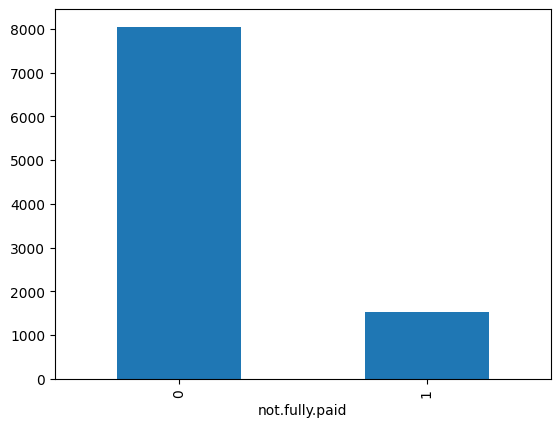

In [45]:
# Checking the distribution of Target by graph
data["not.fully.paid"].value_counts().plot(kind = "bar")
plt.show()

In [46]:
# not.fully.paid 0과 1로 나눠서 데이터 불균형 맞추기
not_fully_paid_0 = data[data['not.fully.paid'] == 0]
not_fully_paid_1 = data[data['not.fully.paid'] == 1]
# shape확인
print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 20)
not_fully_paid_1 (1533, 20)


In [67]:
#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
data = pd.concat([not_fully_paid_0, df_minority_upsampled])

In [68]:
from sklearn.utils import shuffle
df = shuffle(data)

In [69]:
#imbalanced data handled
df['not.fully.paid'].value_counts()  

not.fully.paid
1    8045
0    8045
Name: count, dtype: int64

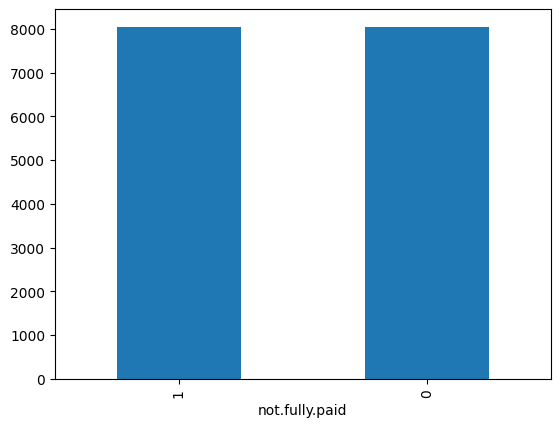

In [70]:
df['not.fully.paid'].value_counts().plot(kind = "bar")
plt.show()

In [71]:
df.shape

(16090, 20)

In [100]:
X = df.drop("not.fully.paid", axis = 1)
y = df["not.fully.paid"]

In [101]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=108, stratify=y)

In [102]:
scaler = StandardScaler()

In [103]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [104]:
X_train_s.shape

(12872, 19)

In [105]:
from tensorflow.keras import layers

In [155]:
# Sequential 모델 정의
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_s.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 함수 사용
])

c:\AI_project\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [158]:
result = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    batch_size=256,
    epochs=100,
    verbose=1,
)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5250 - loss: 0.7340 - val_accuracy: 0.6187 - val_loss: 0.6452
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6141 - loss: 0.6543 - val_accuracy: 0.6321 - val_loss: 0.6361
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 0.6465 - val_accuracy: 0.6349 - val_loss: 0.6319
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 0.6416 - val_accuracy: 0.6395 - val_loss: 0.6284
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6388 - val_accuracy: 0.6401 - val_loss: 0.6262
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 0.6399 - val_accuracy: 0.6485 - val_loss: 0.6237
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6380 - loss: 0.6323 - val_accuracy: 0.6467 - val_loss: 0.6216
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6404 - loss: 0.6275 - val_accuracy: 0.6482 - v

In [159]:
predictions =(model.predict(X_test_s)>0.5).astype("int32") # 0.5: 임계값 / <0.5 = 0 / >0.5 = 1

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

0.7190801740211311

In [161]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1609
           1       0.71      0.75      0.73      1609

    accuracy                           0.72      3218
   macro avg       0.72      0.72      0.72      3218
weighted avg       0.72      0.72      0.72      3218



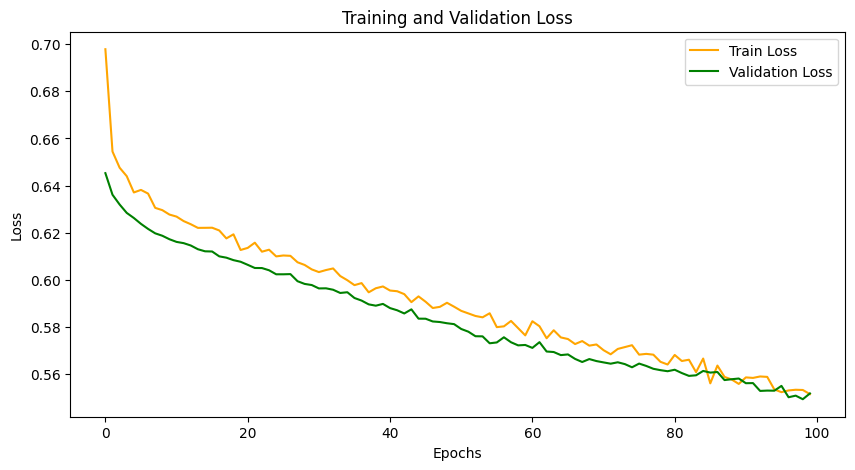

In [162]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(result.history['loss'], label='Train Loss', color='orange')
plt.plot(result.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()